In [1]:
import pandas as pd 

df = pd.read_csv("data.csv", sep=';') 
df.head()

,reference,applicability,sampling,learning,metric
0,\cite{martinez2018},A3,Genetic algorithm,Data Mining Interpolation,"(Neighbors Density, Similarity) Confidence"
1,\cite{valov2015},A1,Random,Bagging,Closeness Range
2,\cite{valov2015},A1,Random,CART,Closeness Range
3,\cite{valov2015},A1,Random,Random Forest,Closeness Range
4,\cite{valov2015},A1,Random,SVM,Closeness Range


In [2]:
from random import randint

def colorApp(target_app):
    df_color = df.query('applicability == "'+target_app+'"').groupby(['metric'], as_index=False).agg({"reference": "count"}) #.unique()

    color = []
    for i in range(len(df_color)):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    df_color['color'] = color 
    
    return df_color

In [3]:
def drawPieMarker(xs, ys, ratios, sizes, colors):
    assert sum(ratios) <= 1, 'sum of ratios needs to be < 1'

    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 10)).tolist() + [0]
        y  = [0] + np.sin(np.linspace(previous, this, 10)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
        markers.append({'marker':xy, 's':np.abs(xy).max()**2*np.array(sizes), 'facecolor':color})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter(xs, ys, **marker, label=colors)
        

In [4]:
def drawplotApp(target_app, df_color):
    df_app = df.query('applicability == "'+target_app+'"').groupby(['sampling', 'learning'], as_index=False).agg({"reference": "count"})
    df_app = df_app
    for index, row in df_app.iterrows():
        xs=row['sampling']
        ys=row['learning']
        ratios, colors, sizes = ([] for i in range(3))
        #df_metric selects the set of metrics associated to each (learning and sampling)
        search = 'applicability == "'+target_app+'" & sampling == "'+xs+'" & learning == "'+ys+'"'
        df_metric = df.query(search).groupby(['metric'], as_index=False).agg({"reference": "count"}) #.unique()
        total = df_metric.reference.sum()
        for i, j in df_metric.iterrows():
            colors.append(str(df_color.query('metric == "'+j['metric']+'"')["color"].iloc[0]))
            ratios.append(j['reference']/total)
        #we use the number of papers associated to each (learning and sampling) to determine the size of the pie
        num_papers = df_app.query('sampling == "'+xs+'" & learning == "'+ys+'"')["reference"].iloc[0]
        sizes.append(200*num_papers)

        drawPieMarker(xs, ys, ratios, sizes, colors)
        

In [5]:
def highlight(s):
    if s.reference >= 1:
        c = s.color
        return ['background-color: '+c]*3
    else:
        return ['background-color: white']*3

,metric,reference,color
0,Closeness Range,4,#66DA3E
1,Coverage,2,#D65151
2,F-measure,15,#E88BF7
3,F-test,4,#A8CA67
4,HE,1,#050AEC
5,Jaccard Similarity,2,#C9C629
6,MAE,5,#F99158
7,MRE,29,#C5A33F
8,Mann-Whitney U-test,4,#7426C7
9,Performance-Relevant Interactions,1,#11FFA2


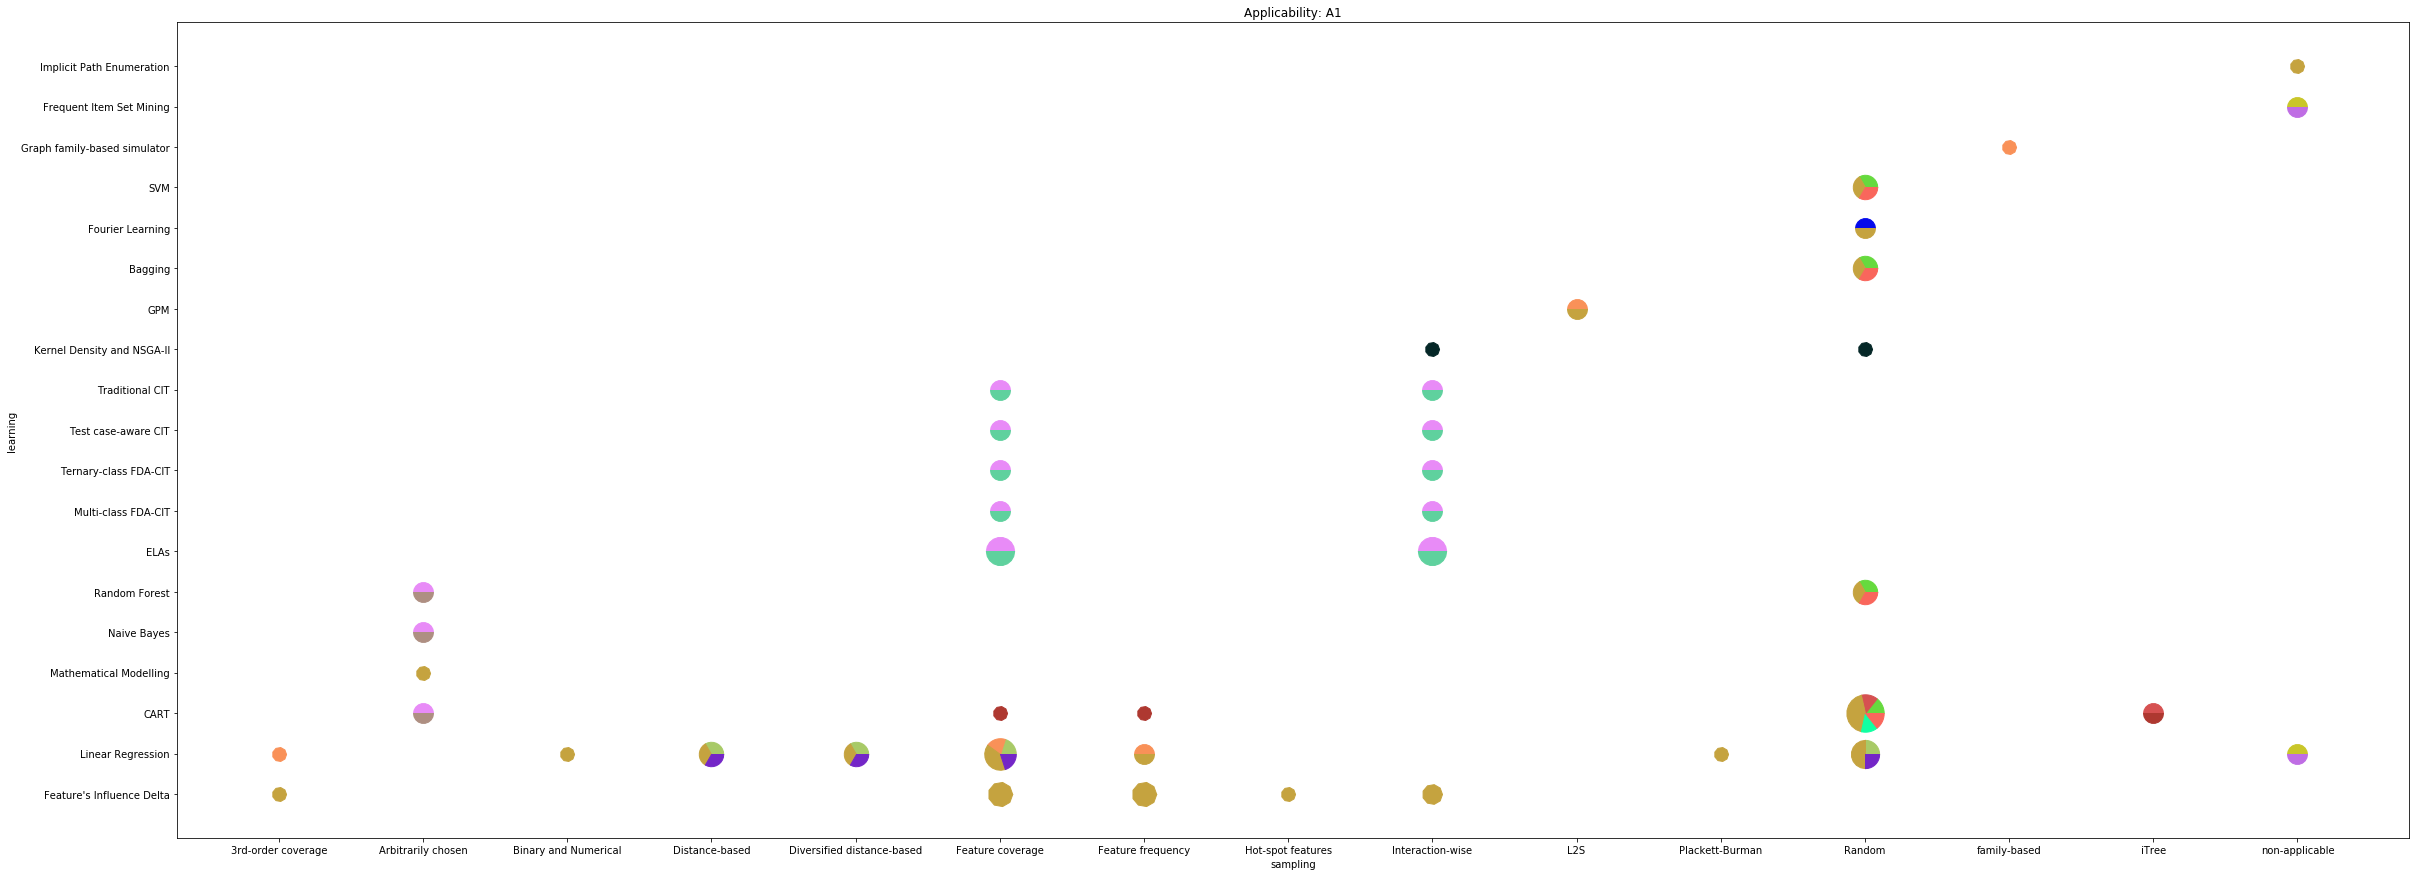

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

for target_app in ["A1"]: 
    fig, ax = plt.subplots(figsize=(40, 15))
    df_color=colorApp(target_app)
    drawplotApp(target_app, df_color)
    plt.title('Applicability: '+target_app)
    plt.xlabel('sampling')
    plt.ylabel('learning')
    plt.savefig(target_app+'.pdf') 
    
df_color.style.apply(highlight, axis=1)

,metric,reference,color
0,GAP,1,#BB517E
1,"KL, (Rank, Pearson, Spearman) Correlation",3,#324C87
2,MRE,6,#45DF0F
3,NI,1,#E16D40
4,Sampling Cost,1,#DDECD4
5,Structure of the model,5,#84DD71
6,non-applicable,2,#179206


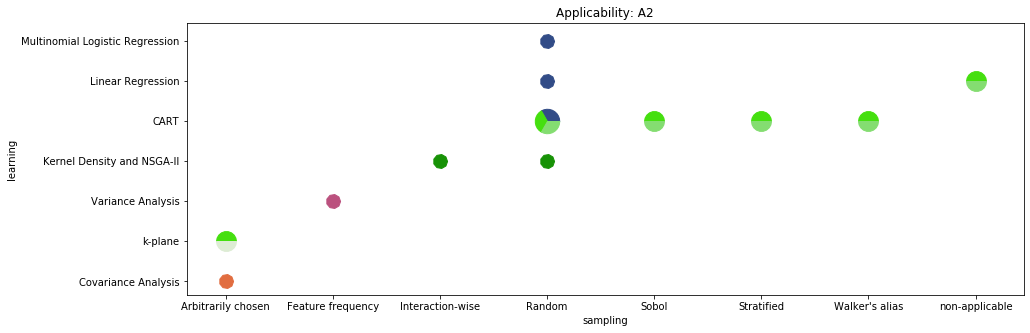

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

for target_app in ["A2"]: 
    fig, ax = plt.subplots(figsize=(15, 5))
    df_color=colorApp(target_app)
    drawplotApp(target_app, df_color)
    plt.title('Applicability: '+target_app)
    plt.xlabel('sampling')
    plt.ylabel('learning')
    plt.savefig(target_app+'.pdf') 

df_color.style.apply(highlight, axis=1)

,metric,reference,color
0,"(Neighbors Density, Similarity) Confidence",1,#C3813A
1,Error Probability,1,#802325
2,Experts Feedback,11,#B911B4
3,HE,12,#0E2E2C
4,"LT15, LT30",1,#A2549E
5,"LT15, LT31",1,#BD6FAC
6,"LT15, LT32",1,#4679B3
7,"LT15, LT33",1,#DC2CD6
8,"LT15, LT34",1,#C44F98
9,"LT15, LT35",1,#B2B627


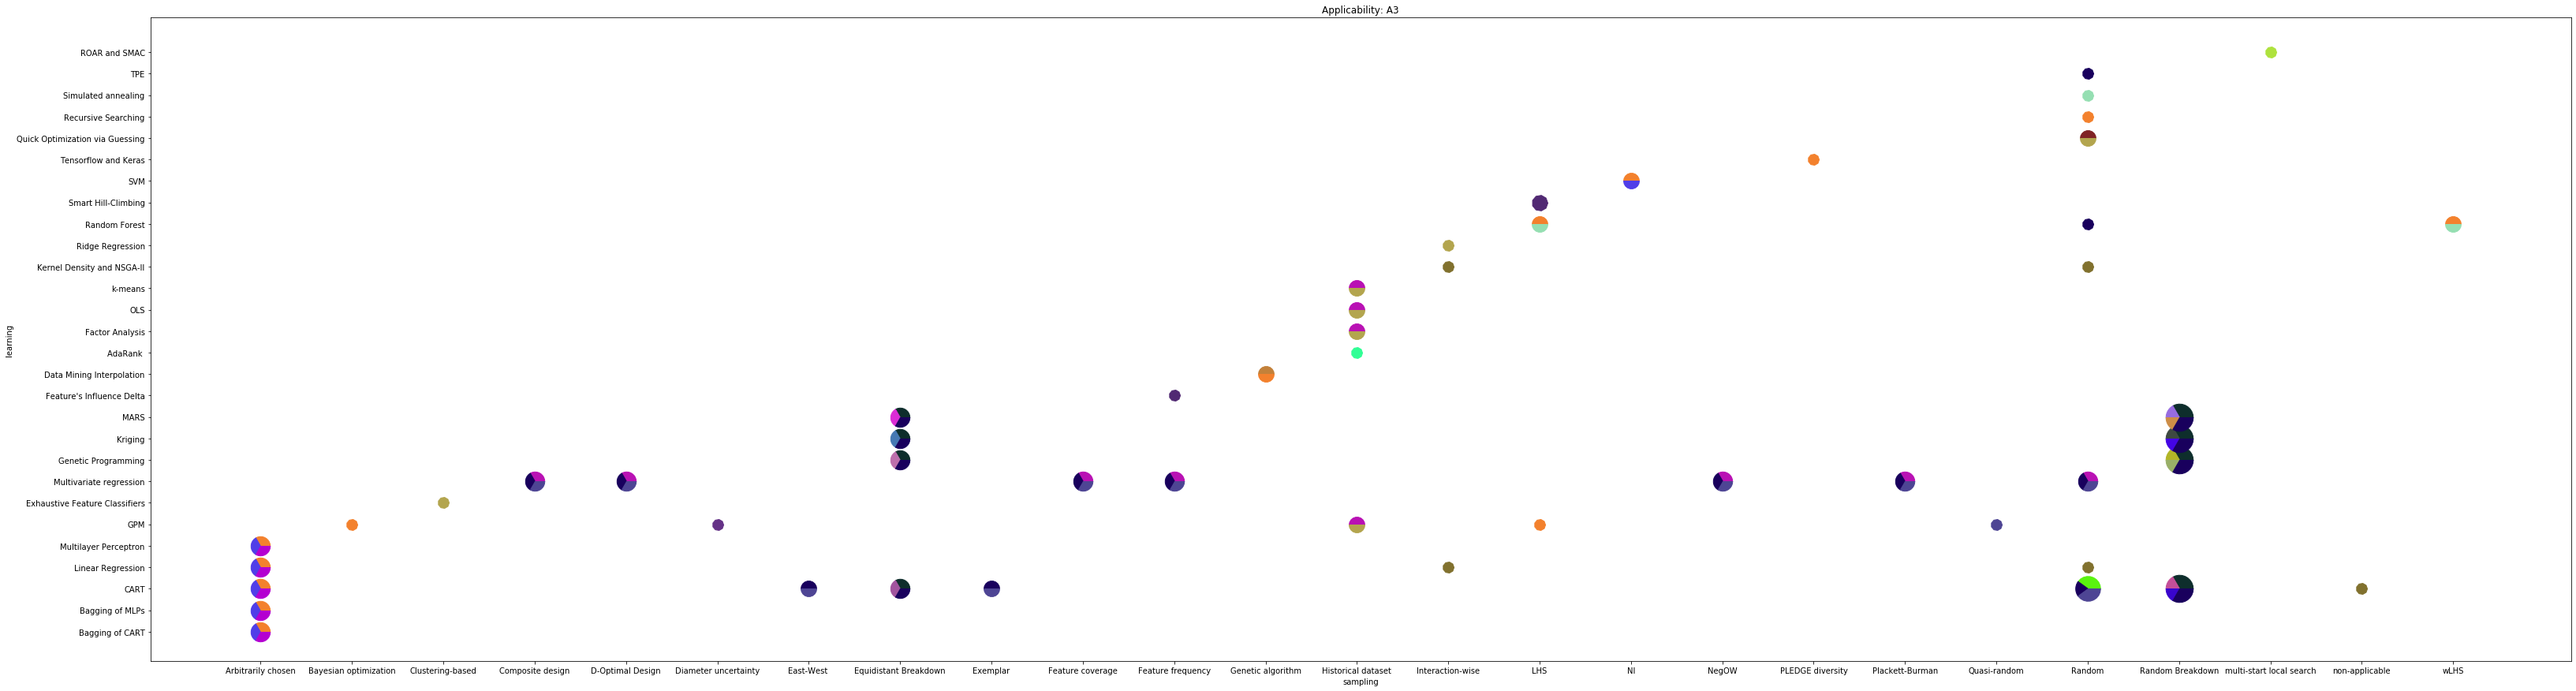

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

for target_app in ["A3"]: 
    fig, ax = plt.subplots(figsize=(55, 15))
    df_color=colorApp(target_app)
    drawplotApp(target_app, df_color)
    plt.title('Applicability: '+target_app)
    plt.xlabel('sampling')
    plt.ylabel('learning')
    plt.savefig(target_app+'.pdf') 

df_color.style.apply(highlight, axis=1)

,metric,reference,color
0,F-test,4,#3D8718
1,MAE,1,#72AF02
2,MRE,2,#937427
3,MSE,4,#C33322
4,NI,1,#D1B704
5,"Precision, Recall",1,#AC2E9F
6,Qualitative Analysis,1,#8A6ED9
7,Rank Accuracy,1,#818F04
8,Rank Correlation,1,#21814C
9,Ranking Constraints,2,#053A25


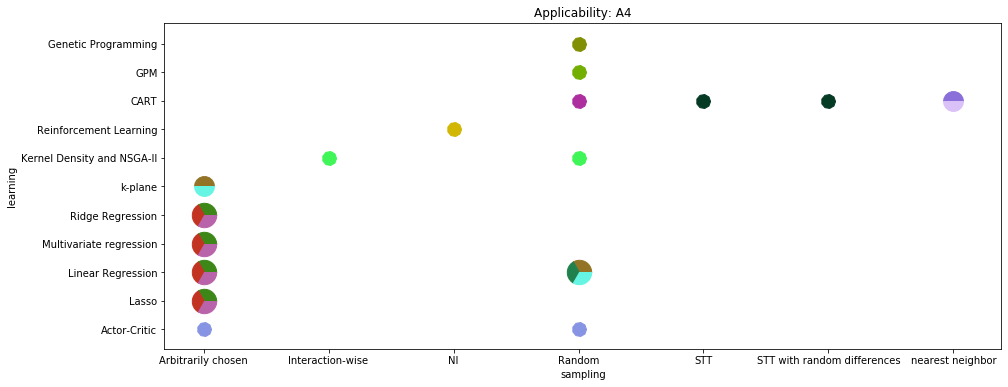

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

for target_app in ["A4"]: 
    fig, ax = plt.subplots(figsize=(15, 6))
    df_color=colorApp(target_app)
    drawplotApp(target_app, df_color)
    plt.title('Applicability: '+target_app)
    plt.xlabel('sampling')
    plt.ylabel('learning')
    plt.savefig(target_app+'.pdf', bbox_inches='tight') 

df_color.style.apply(highlight, axis=1)

,metric,reference,color
0,Delaney’s Statistics,1,#E5D348
1,Distance Function,1,#04651C
2,"Equivalence, FID, TRM",5,#DCD03D
3,F-measure,16,#9BF6E6
4,HV,1,#AE740E
5,Mann-Whitney U-test,1,#152234
6,"Precision, Recall",3,#612B95
7,Qualitative Analysis,2,#B0A58F
8,Ranking Constraints,2,#A7CC25
9,non-applicable,2,#80FD7F


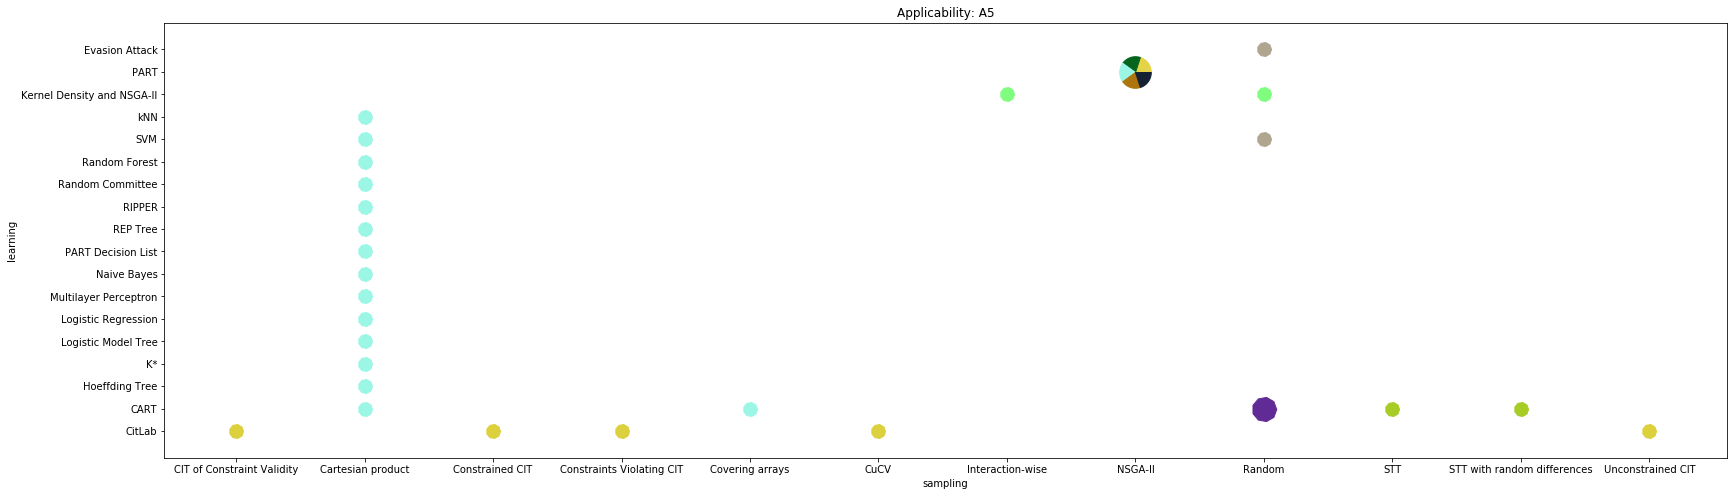

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

for target_app in ["A5"]: 
    fig, ax = plt.subplots(figsize=(28, 8))
    df_color=colorApp(target_app)
    drawplotApp(target_app, df_color)
    plt.title('Applicability: '+target_app)
    plt.xlabel('sampling')
    plt.ylabel('learning')
    plt.savefig(target_app+'.pdf') 

df_color.style.apply(highlight, axis=1)

,metric,reference,color
0,NI,1,#7A337B
1,non-applicable,3,#28AFB8


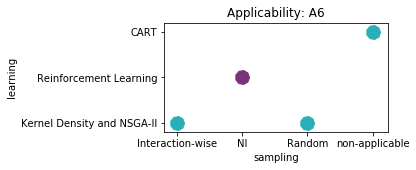

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

for target_app in ["A6"]: 
    fig, ax = plt.subplots(figsize=(4, 2))
    df_color=colorApp(target_app)
    drawplotApp(target_app, df_color)
    plt.title('Applicability: '+target_app)
    plt.xlabel('sampling')
    plt.ylabel('learning')
    plt.savefig(target_app+'.pdf') 

df_color.style.apply(highlight, axis=1)